# Build a multi-model machine learning pipeline for Breast Cancer Prediction using several classification algorithms, and compare their performance using multiple evaluation metrics.


In [141]:
#Loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
df= load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [143]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [145]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

Goal: Predict whether a tumor is malignant (1) or benign (0).

Malignant The tumor is cancerous, dangerous, and spreads quickly.

Benign The tumor is non-cancerous, safe, and does not spread.

In [148]:
X=df.data
y=df['target']

# Spliting the data and Normalization of the features

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [197]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [199]:
from sklearn.preprocessing import StandardScaler
import joblib
joblib.dump(scaler, "scaler.pkl") 

['scaler.pkl']

# Defining multiple models

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [204]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}


# Training , predicting and Evaluating

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [209]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # for ROC-AUC
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021  0.997380
1        Random Forest  0.964912   0.958904  0.985915  0.972222  0.996397
2    Gradient Boosting  0.956140   0.958333  0.971831  0.965035  0.995087
3                  SVM  0.982456   0.972603  1.000000  0.986111  0.997380
4                  KNN  0.947368   0.957746  0.957746  0.957746  0.981985


SVM or Logistic Regression usually perform best on this dataset.

# Visual performance of models

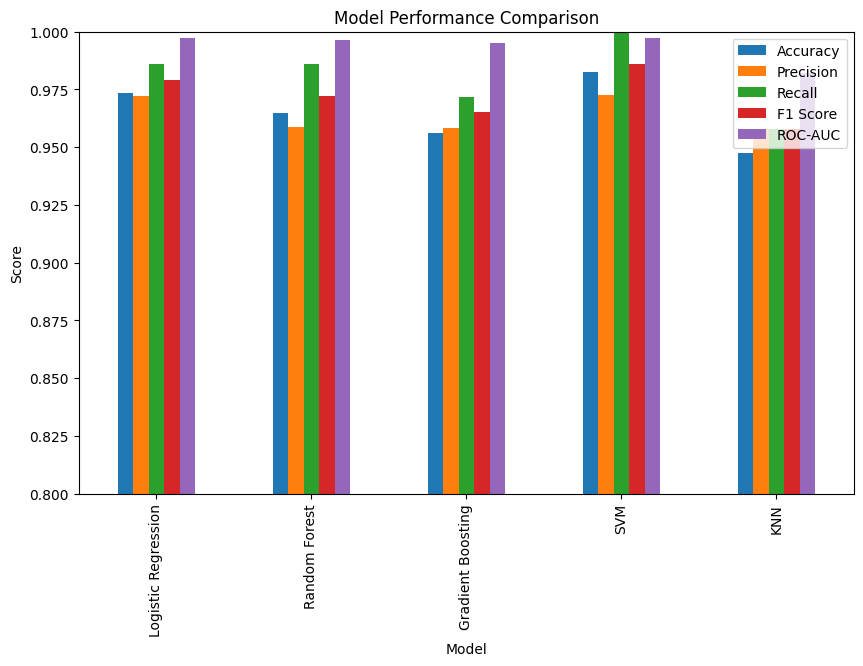

In [212]:
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].plot(
    kind="bar", figsize=(10, 6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.show()

# **Conclusion** - SVM or Logistic Regression usually perform best on this dataset.

# saving the trained models 

In [ ]:
import joblib
import os

# create a folder to store all models -folder name= models
os.makedirs("models", exist_ok=True)

# save each model inside the folder
for name, model in models.items():
    joblib.dump(model, f"models/{name.replace(' ', '_')}.pkl")

print("✅ All models have been saved successfully inside the 'models' folder!")
